# Library Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from imblearn.over_sampling import RandomOverSampler

# Load Train - Test Dataset

In [ ]:
!unzip '/content/drive/MyDrive/Data Science/Projects/Emotion Recognition/Data/Data Set.zip'

Archive:  /content/drive/MyDrive/Data Science/Projects/Emotion Recognition/Data/Data Set.zip
replace Data Set/fer2013.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Data Set/fer2013.csv    


In [ ]:
dataset = pd.read_csv('Data Set/fer2013.csv')

In [ ]:
dataset

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [ ]:
pixel_data = dataset['pixels']
label_data = dataset['emotion']

In [ ]:
pixel_data

0        70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        151 150 147 155 148 133 111 140 170 174 182 15...
2        231 212 156 164 174 138 161 173 182 200 106 38...
3        24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
                               ...                        
35882    50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
35883    178 174 172 173 181 188 191 194 196 199 200 20...
35884    17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
35885    30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...
35886    19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...
Name: pixels, Length: 35887, dtype: object

In [ ]:
pixels_images = pixel_data.values.reshape(-1,1)

In [ ]:
# Using RandomOverSampler

oversampler = RandomOverSampler(sampling_strategy='auto')

pixels_data, labels_data = oversampler.fit_resample(pixels_images, label_data)    # Generate OverSampler Data for pixels and labels

In [ ]:
print(pixels_data.shape)
pixels_data

(62923, 1)


array([['70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 

In [ ]:
# Flatten training Image pixels and convert it to Series

flatten_pixels_data = pd.Series(pixels_data.flatten())

In [ ]:
flatten_pixels_data

0        70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        151 150 147 155 148 133 111 140 170 174 182 15...
2        231 212 156 164 174 138 161 173 182 200 106 38...
3        24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
                               ...                        
62918    51 69 46 21 92 146 91 83 94 194 116 87 108 67 ...
62919    213 217 212 202 232 249 248 250 247 245 239 23...
62920    43 62 154 91 34 78 66 61 46 65 66 73 64 59 40 ...
62921    0 0 0 1 1 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 ...
62922    50 59 79 74 72 73 89 82 76 63 69 71 79 79 98 1...
Length: 62923, dtype: object

In [ ]:
# Convert the string of pixels to an array.

str_to_array_pxl = [np.fromstring(x, dtype=int, sep=' ').reshape(-1, 48, 48, 1) for x in flatten_pixels_data]
str_to_array_pxl = np.concatenate(str_to_array_pxl)
print(str_to_array_pxl.shape)         # (62923, 48, 48, 1)
str_to_array_pxl

(62923, 48, 48, 1)


array([[[[ 70],
         [ 80],
         [ 82],
         ...,
         [ 52],
         [ 43],
         [ 41]],

        [[ 65],
         [ 61],
         [ 58],
         ...,
         [ 56],
         [ 52],
         [ 44]],

        [[ 50],
         [ 43],
         [ 54],
         ...,
         [ 49],
         [ 56],
         [ 47]],

        ...,

        [[ 91],
         [ 65],
         [ 42],
         ...,
         [ 72],
         [ 56],
         [ 43]],

        [[ 77],
         [ 82],
         [ 79],
         ...,
         [105],
         [ 70],
         [ 46]],

        [[ 77],
         [ 72],
         [ 84],
         ...,
         [106],
         [109],
         [ 82]]],


       [[[151],
         [150],
         [147],
         ...,
         [129],
         [140],
         [120]],

        [[151],
         [149],
         [149],
         ...,
         [122],
         [141],
         [137]],

        [[151],
         [151],
         [156],
         ...,
         [109],
         [

In [ ]:
labels_data = np.array(labels_data).reshape(labels_data.shape[0], 1)
print(labels_data.shape)
labels_data

(62923, 1)


array([[0],
       [0],
       [2],
       ...,
       [6],
       [6],
       [6]])

### Split Train Test Data

In [ ]:
from sklearn.model_selection import train_test_split

training_img, testing_img, training_label, testing_label = train_test_split(str_to_array_pxl, labels_data, test_size = 0.1, random_state = 45)

In [ ]:
print(training_img.shape)   # (56630, 48, 48, 1)
training_img

(56630, 48, 48, 1)


array([[[[ 72],
         [135],
         [184],
         ...,
         [203],
         [202],
         [205]],

        [[ 88],
         [161],
         [170],
         ...,
         [206],
         [203],
         [205]],

        [[102],
         [184],
         [165],
         ...,
         [198],
         [202],
         [205]],

        ...,

        [[163],
         [170],
         [176],
         ...,
         [166],
         [178],
         [181]],

        [[136],
         [149],
         [164],
         ...,
         [209],
         [209],
         [198]],

        [[ 71],
         [110],
         [136],
         ...,
         [189],
         [208],
         [202]]],


       [[[151],
         [156],
         [160],
         ...,
         [116],
         [120],
         [125]],

        [[152],
         [156],
         [159],
         ...,
         [116],
         [121],
         [124]],

        [[153],
         [156],
         [160],
         ...,
         [115],
         [

In [ ]:
print(testing_img.shape)    # (6293, 48, 48, 1)
testing_img

(6293, 48, 48, 1)


array([[[[ 63],
         [ 81],
         [ 81],
         ...,
         [231],
         [252],
         [254]],

        [[ 69],
         [ 78],
         [ 83],
         ...,
         [214],
         [251],
         [254]],

        [[ 78],
         [ 81],
         [ 79],
         ...,
         [202],
         [244],
         [255]],

        ...,

        [[ 75],
         [ 77],
         [ 79],
         ...,
         [ 67],
         [ 69],
         [ 73]],

        [[ 74],
         [ 75],
         [ 78],
         ...,
         [ 67],
         [ 69],
         [ 72]],

        [[ 73],
         [ 75],
         [ 76],
         ...,
         [ 68],
         [ 71],
         [ 73]]],


       [[[ 72],
         [ 77],
         [ 76],
         ...,
         [ 60],
         [ 51],
         [ 40]],

        [[ 73],
         [ 84],
         [ 80],
         ...,
         [ 54],
         [ 56],
         [ 47]],

        [[ 79],
         [ 86],
         [ 80],
         ...,
         [ 43],
         [

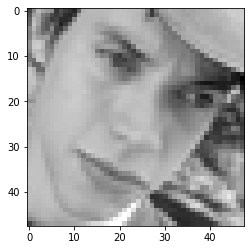

In [ ]:
plt.imshow(training_img[0,:,:,0],cmap='gray')

# Model Training

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,Dropout,MaxPooling2D
from keras.layers import Conv2D, MaxPool2D, AveragePooling2D, Input, BatchNormalization, MaxPooling2D, Activation, Flatten, Dense, Dropout

In [ ]:
from keras.models import Sequential
model = Sequential()
model.add(Conv2D(32,(3,3),strides=(1,1), padding='valid',activation='relu',input_shape=(48,48,1)))
model.add(BatchNormalization(axis=3))

model.add(Conv2D(64,(3,3),strides=(1,1), padding = 'same',activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),strides=(1,1), padding = 'valid',activation='relu'))
model.add(BatchNormalization(axis=3))


model.add(Conv2D(128,(3,3),strides=(1,1), padding = 'same',activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),strides=(1,1), padding = 'valid',activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(7,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 batch_normalization_5 (Batc  (None, 46, 46, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 batch_normalization_6 (Batc  (None, 46, 46, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                      

In [ ]:
from tensorflow.keras.optimizers import Adam

adam = Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.utils.np_utils import to_categorical

training_labels = to_categorical(training_label, num_classes=7)
testing_labels = to_categorical(testing_label, num_classes=7)

In [ ]:
training_labels

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
testing_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
history = model.fit(training_img, training_labels,
                    epochs = 40,
                    validation_data = (testing_img, testing_labels))

Epoch 1/40
1770/1770 [==============================] - 49s 27ms/step - loss: 1.8785 - accuracy: 0.2872 - val_loss: 1.4689 - val_accuracy: 0.4545
Epoch 2/40
1770/1770 [==============================] - 48s 27ms/step - loss: 1.4498 - accuracy: 0.4429 - val_loss: 1.2258 - val_accuracy: 0.5330
Epoch 3/40
1770/1770 [==============================] - 46s 26ms/step - loss: 1.2564 - accuracy: 0.5195 - val_loss: 1.1078 - val_accuracy: 0.5799
Epoch 4/40
1770/1770 [==============================] - 46s 26ms/step - loss: 1.1176 - accuracy: 0.5699 - val_loss: 1.0108 - val_accuracy: 0.6077
Epoch 5/40
1770/1770 [==============================] - 46s 26ms/step - loss: 1.0194 - accuracy: 0.6091 - val_loss: 0.9490 - val_accuracy: 0.6345
Epoch 6/40
1770/1770 [==============================] - 46s 26ms/step - loss: 0.9393 - accuracy: 0.6415 - val_loss: 0.9099 - val_accuracy: 0.6512
Epoch 7/40
1770/1770 [==============================] - 46s 26ms/step - loss: 0.8684 - accuracy: 0.6725 - val_loss: 0.8512 -

## Graphs

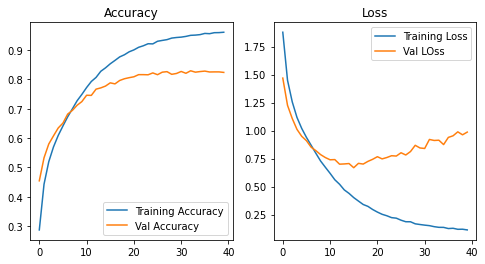

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(40)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Val Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Val LOss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()